In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np


def count_frequencies(annotations):
    counts = np.bincount(annotations)
    counts = np.pad(
        counts, (0, 7 - len(counts)), "constant"
    )  # Preenche com zeros as classes ausentes
    return counts


def extract_annotations(file_path):
    with h5py.File(file_path, "r") as hf:
        annotations_group = hf["annotations"]
        annotations = [ann[()].flatten() for ann in annotations_group.values()]
    return np.concatenate(annotations)


def plot_histogram(counts, title):
    plt.figure(figsize=(10, 5))
    classes = [
        "(nothing)",
        "scream",
        "Violência Física",
        "gunshot",
        "explosion",
        "scream_effort",
        "multiple_actions",
    ]
    plt.bar(classes, counts, alpha=0.5, edgecolor="black", linewidth=1.2)
    plt.title(title)
    plt.xlabel("Classes")
    plt.ylabel("Frequência")
    plt.show()

In [4]:
import os


def main(path):
    files = [
        os.path.join(path, f)
        for f in os.listdir(path)
        if f.endswith("feature.h5") and os.path.isfile(os.path.join(path, f))
    ]
    count_total = []

    for file in files:
        if "HEAR_Test" in file:
            continue
        annotations = extract_annotations(file)
        counts = count_frequencies(annotations)
        count_total.append(counts)
        plot_histogram(counts, f"Histogram for {os.path.basename(file)}")
    plot_histogram(sum(count_total), f"Histogram Total")

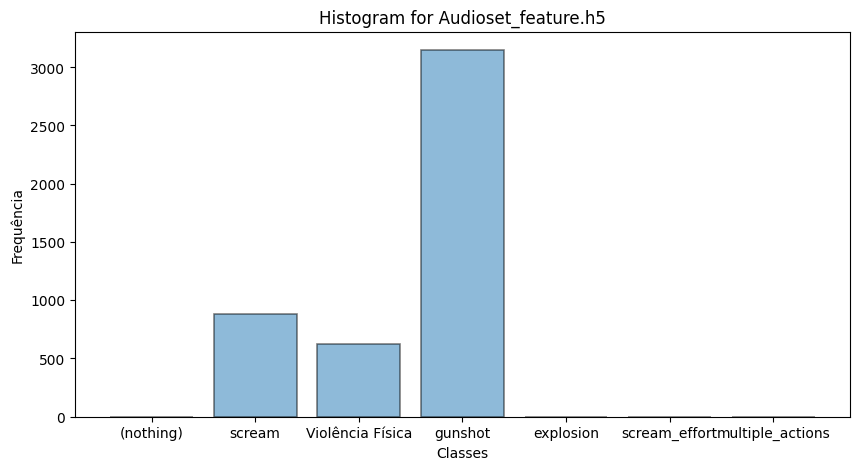

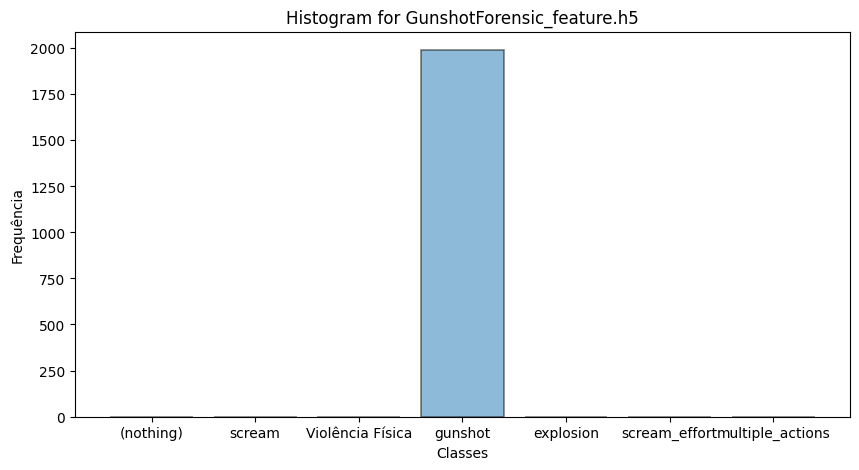

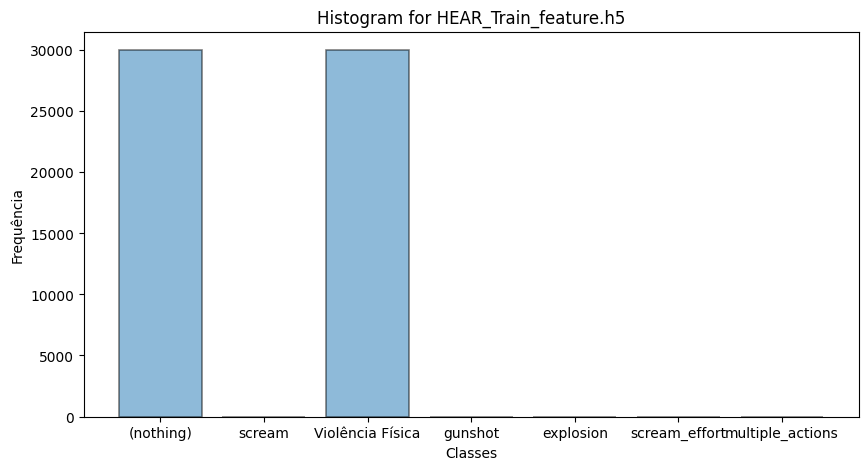

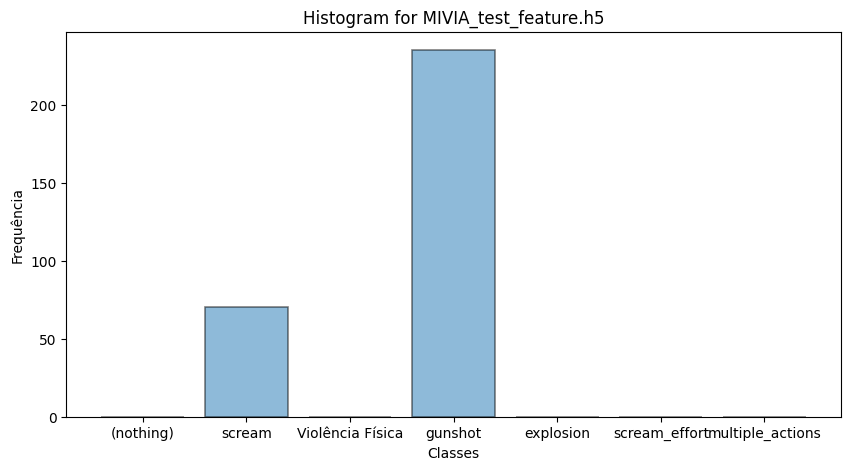

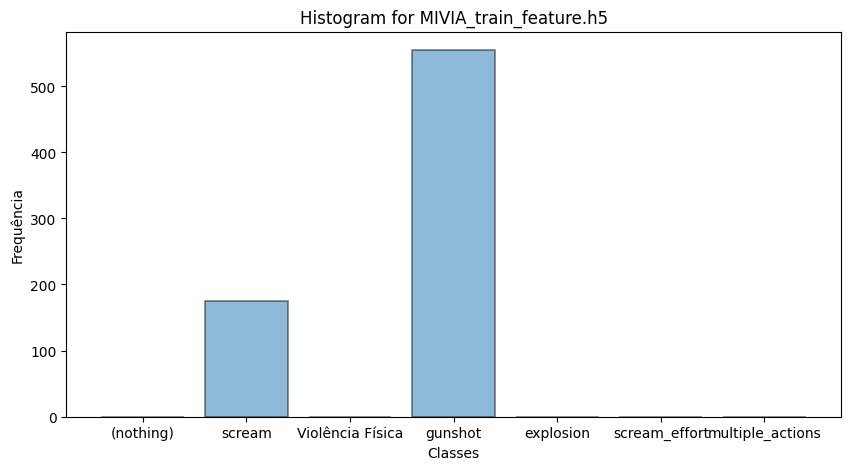

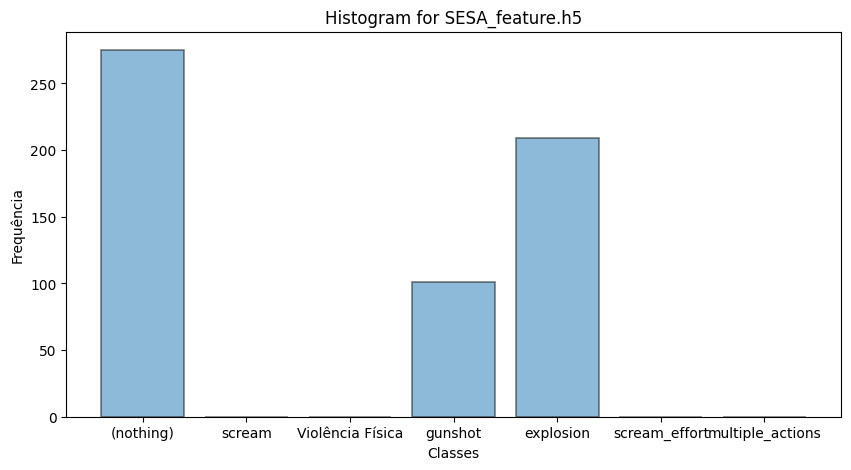

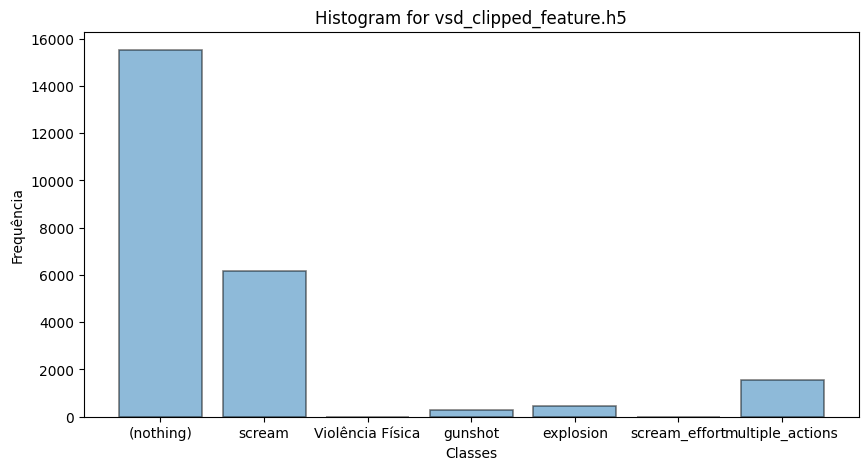

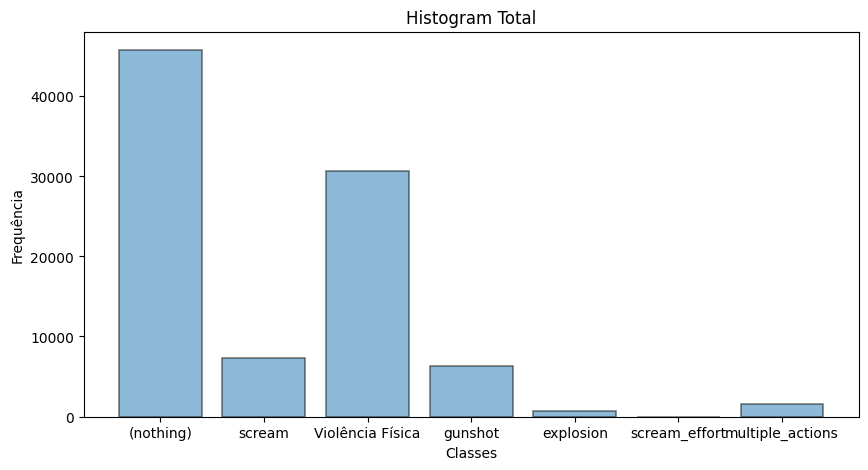

In [5]:
path = "../h5_files"  # substitua pelo caminho do diretório com os arquivos h5
main(path)